# Movies Clustering

- Ricardo Méndez 21289
- Sara Echeverría 21371
- Sebastián Juárez 21471

Enlace al repositorio: https://github.com/bl33h/moviesClustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/movies.csv', encoding='latin1')
df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


### 1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [4]:
print(df.columns)

Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'],
      dtype='object')


Quitar las columnas que no son útiles para el modelo.

In [5]:
features = df.copy()
columns_to_drop = ['genres', 'homePage','productionCompany','productionCompanyCountry','productionCountry','video','director','actors','actorsCharacter',
        'originalTitle', 'title', 'originalLanguage','releaseDate','castMenAmount', 'castWomenAmount', 'actorsPopularity']
features = features.drop(columns=columns_to_drop)
print(features)

          id    budget      revenue  runtime  popularity  voteAvg  voteCount  \
0          5   4000000    4257354.0       98      20.880      5.7       2077   
1          6  21000000   12136938.0      110       9.596      6.5        223   
2         11  11000000  775398007.0      121     100.003      8.2      16598   
3         12  94000000  940335536.0      100     134.435      7.8      15928   
4         13  55000000  677387716.0      142      58.751      8.5      22045   
...      ...       ...          ...      ...         ...      ...        ...   
9995  920081         0          0.0      100      16.662      6.8        108   
9996  920143         0          0.0       97     491.706      1.5          2   
9997  922017         0          0.0      112     565.658      6.1         30   
9998  922162         0          0.0       59       9.664      6.0          1   
9999  922260    254056     254042.0        0      83.747      4.7          3   

      genresAmount  productionCoAmount 

In [6]:
features.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   revenue                    10000 non-null  float64
 3   runtime                    10000 non-null  int64  
 4   popularity                 10000 non-null  float64
 5   voteAvg                    10000 non-null  float64
 6   voteCount                  10000 non-null  int64  
 7   genresAmount               10000 non-null  int64  
 8   productionCoAmount         10000 non-null  int64  
 9   productionCountriesAmount  10000 non-null  int64  
 10  actorsAmount               10000 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 859.5 KB


A criterio propio y considerando tanto el tipo de dato de cada una de las variables, como su papel en el dataset, es posible especular su clasificación de la siguiente manera:

- Variables no útiles para clustering
    - [originalLanguage, video, director, actors, actorsCharacter]
        - A pesar de que manifiestan insights cualitativos, su variabilidad y naturaleza categórica complican su uso directo en el clustering sin una transformación adecuada.

- Variables irrelevantes para clustering
    - [id, originalTitle, title, homePage, releaseDate (depende del contexto)]
        - Pues son id's o URLs que no aportan información agrupable sobre las características importantes de las películas.

- Variables útiles para clustering
    - [popularity, budget, revenue, runtime, genresAmount, productionCoAmount, productionCountriesAmount, voteCount, voteAvg]´
        - Ya que al ser variables cuantitativas, estas ofrecen una base sólida para agrupar las películas basándose en popularidad, aspectos financieros, contenido, involucrados y recepción del público.

### 2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Discuta sus resultados e impresiones.

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Hopkins value: 0.9887178896707888


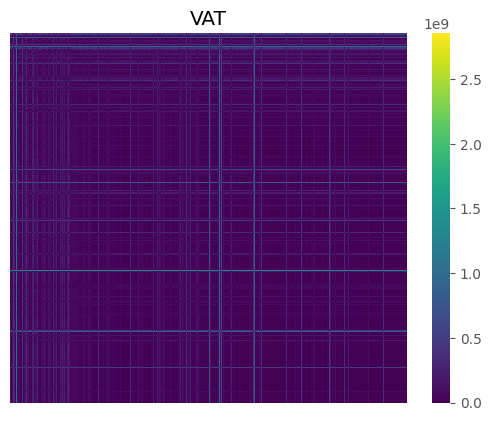

None


In [8]:
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

# hopkins
def hopkins_statistic(X):
    # dots number in the df (features)
    n = len(X)  
    # selected dots number in the df (features)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = np.random.uniform(X.min(), X.max(), size=(m, X.shape[1]))
    u_dist, _ = nbrs.kneighbors(X.sample(m), n_neighbors=2)
    
    # ignore its own distance
    u_dist = u_dist[:, 1]  
    w_dist, _ = nbrs.kneighbors(rand_X, n_neighbors=1)
    
    H = w_dist.sum() / (u_dist.sum() + w_dist.sum())
    return H

# vat
def vat(X):
    pairwise_dists = squareform(pdist(X, 'euclidean'))
    sns.heatmap(pairwise_dists, xticklabels=False, yticklabels=False, cmap='viridis')
    plt.title('VAT')
    plt.show()

# features placement variable
X = features 

# Hopkins
H = hopkins_statistic(X)
print(f'Hopkins value: {H}')

# VAT
print(vat(X))

El valor de Hopkins siendo de 0.987 manifiesta que existe una fuerte tendencia al agrupamiento en los features seleccionados del dataframe. De igual manera, en el gráfico VAT es posible visualizar cuadrados a lo largo de la diagonal, afirmando la presencia de clusters.

### 3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

In [9]:
dist_sums = []
K = range(1,11)
for k in K:
    km = KMeans(k)
    km = km.fit(features)
    dist_sums.append(km.inertia_)

In [10]:
dist_sums

[2.3715007878094576e+20,
 9.06861886997235e+19,
 4.7730333503750275e+19,
 3.338028660881118e+19,
 2.2418779028174615e+19,
 1.7600477121943394e+19,
 1.3516291114277319e+19,
 1.129965304176249e+19,
 1.0263195469337676e+19,
 8.811160996781187e+18]

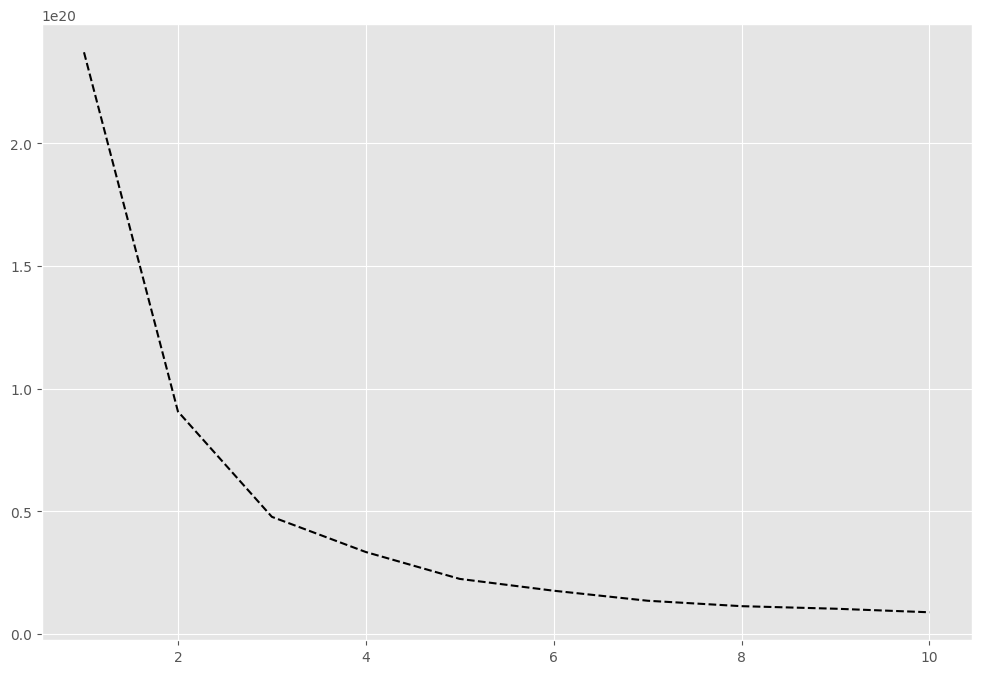

In [11]:
figure = plt.figure(figsize=(12,8))
plt.plot(K,dist_sums, 'k--')

##### La gráfica de codo indica el número de clusters óptimo a utilizar. Esto se debe a que evalúa métodos anteriormente implementados con distintas cantidades de clusters. En este caso se empleó un rago de 1 a 10. Se puede observar que el momento en que la pendiente de la gráfica disminuye es en k=3, por lo que será nuestro k a utilizar en los siguientes modelos.

### 4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno.

In [12]:
n_clusters = 3

k_means = KMeans(n_clusters=n_clusters)
k_means.fit(features)

KMeans(n_clusters=3)

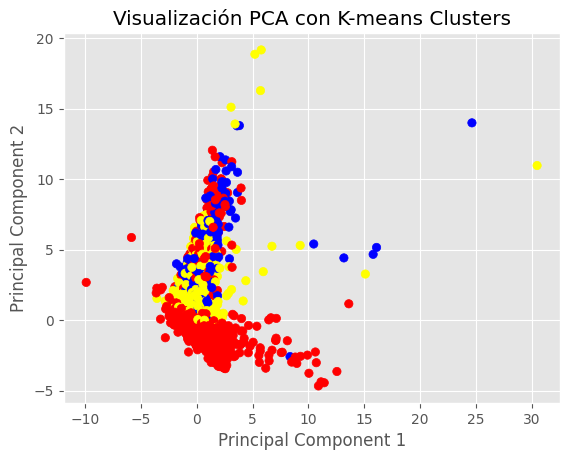

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

cluster_colors = {0: 'red', 1: 'blue', 2: 'yellow'}
cmap = ListedColormap([cluster_colors[label] for label in range(len(cluster_colors))])


plt.scatter(df_pca[:, 1], df_pca[:, 0], c=km.labels_, cmap=cmap)
plt.title('Visualización PCA con K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


##### Se puede ver que ni ajustando las features utilizando PCA es posible ver un clustering definido. Esto se debe a la gran cantidad de variables que se emplearon, pues no es sencillo ni eficiente escalarlas a solamente dos variables para poder graficarlo.

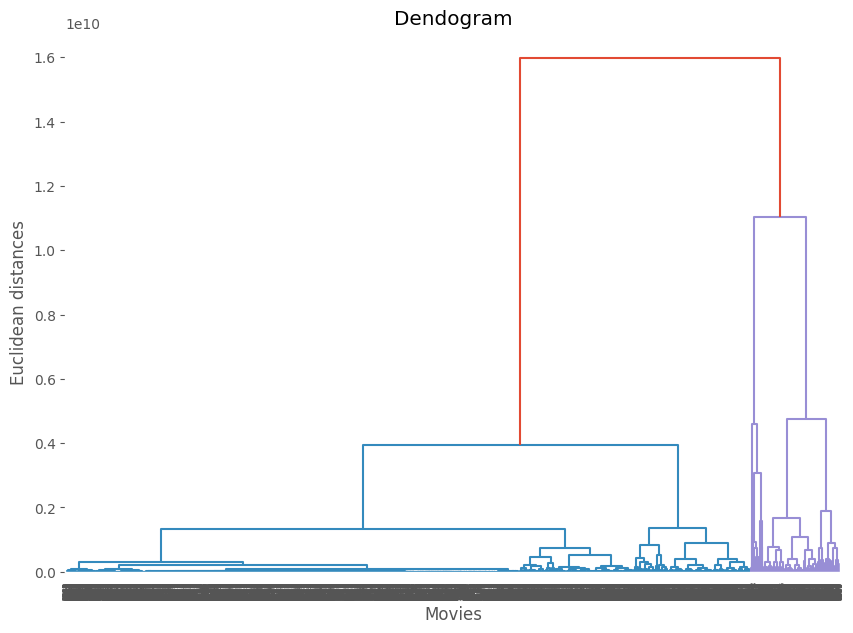

In [14]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.title('Dendogram')
plt.xlabel('Movies')
plt.ylabel('Euclidean distances')
plt.show()

##### En el dendograma se pueden ver solo dos líneas provenientes de la raíz. El principal uso de este gráfico es revisar cuántas lineas son igual o más pequeñas que la línea con mayor longitud encontrada, pues ese número será el número de clusters. En este caso, la línea del grupo azul es la más larga y solo existe una línea más que es más corta. Por ello, el número de clusters es 2.

In [15]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cl = cluster.fit_predict(features)

In [16]:
km_score = silhouette_score(features, k_means.labels_)

hier_score = silhouette_score(features, cl)

print('K-means silhouette score:', km_score)
print('Hierarchical silhouette score:', hier_score)



K-means silhouette score: 0.8040058165808694
Hierarchical silhouette score: 0.8082963086675405


### 5. Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

In [17]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cl = cluster.fit_predict(features)


In [18]:
km_score = silhouette_score(features, k_means.labels_)

hier_score = silhouette_score(features, cl)

print('K-means silhouette score:', km_score)
print('Hierarchical silhouette score:', hier_score)

K-means silhouette score: 0.8040058165808694
Hierarchical silhouette score: 0.8082963086675405


La puntuación de la silueta es una medida de la cohesión y separación de los clusters en un conjunto de datos.

Un valor de silueta cercano a 1 indica que el punto está bien clasificado en su cluster y mal clasificado en otros clusters, lo que sugiere un buen agrupamiento. Un valor cercano a 0 indica que el punto está cerca del límite entre dos clusters, mientras que un valor negativo indica que el punto puede estar mal clasificado.

Ambos algoritmos han producido puntuaciones de silueta relativamente altas, lo que sugiere que los clusters generados son compactos y bien separados. Sin embargo, la puntuación de la silueta para el Clustering Jerárquico es ligeramente mayor que la del K-medias.

Esto indica que, en este conjunto de datos específico, el Clustering Jerárquico puede haber producido una partición de los datos ligeramente mejor en términos de separación entre clusters. Sin embargo, la diferencia entre las puntuaciones es pequeña, por lo que ambos algoritmos parecen haber realizado un buen trabajo en la formación de clusters.

### 6. Interprete los grupos basado en el conocimiento que tiene de los datos. Recuerde investigar las medidas de tendencia central de las variables continuas y las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.

In [19]:
# Punto 2: Medidas de Tendencia Central
for cluster_id in range(n_clusters):
    cluster_data = features[k_means.labels_ == cluster_id]
    print(f"Cluster {cluster_id}:")
    print("Media:")
    print(cluster_data.mean())
    print("Mediana:")
    print(cluster_data.median())
    print("Moda:")
    print(cluster_data.mode().iloc[0])

Cluster 0:
Media:
id                           1.506727e+05
budget                       1.581738e+08
revenue                      9.181333e+08
runtime                      1.296905e+02
popularity                   2.304777e+02
voteAvg                      7.191071e+00
voteCount                    1.217451e+04
genresAmount                 3.255952e+00
productionCoAmount           3.232143e+00
productionCountriesAmount    1.476190e+00
actorsAmount                 6.727381e+01
dtype: float64
Mediana:
id                           8.284700e+04
budget                       1.600000e+08
revenue                      8.195547e+08
runtime                      1.310000e+02
popularity                   1.337945e+02
voteAvg                      7.200000e+00
voteCount                    1.140250e+04
genresAmount                 3.000000e+00
productionCoAmount           3.000000e+00
productionCountriesAmount    1.000000e+00
actorsAmount                 6.000000e+01
dtype: float64
Moda:
id           

### Cluster 0:
#### Mediana:
La mediana de budget y revenue es cero, lo que sugiere que hay muchas películas en este cluster con presupuesto y ganancias bajos.
#### Moda:
La moda de runtime es 90 minutos, lo que sugiere que la duración de la mayoría de las películas en este cluster es de alrededor de 90 minutos.
### Cluster 1:
#### Moda:
La moda de budget es $40,000,000, lo que sugiere que hay varias películas en este cluster con un presupuesto alrededor de $40,000,000.
### Cluster 2:
#### Mediana:
budget: $160,000,000
revenue: $819,554,700
runtime: 131 minutos
#### Moda:
La moda de budget es $200,000,000, lo que sugiere que hay varias películas en este cluster con un presupuesto alrededor de $200,000,000.

In [20]:
# Punto 3: Tablas de Frecuencia
for cluster_id in range(n_clusters):
    cluster_data = features[k_means.labels_ == cluster_id]
    print(f"Cluster {cluster_id}:")
    print("Tabla de Frecuencia:")
    # Por cada variable categórica en tus datos, puedes imprimir su tabla de frecuencia
    for column in cluster_data.columns:  # Suponiendo que todas las variables categóricas están en 'cluster_data'
        if cluster_data[column].dtype == 'object':  # Si la variable es categórica
            print(cluster_data[column].value_counts())


Cluster 0:
Tabla de Frecuencia:
Cluster 1:
Tabla de Frecuencia:
Cluster 2:
Tabla de Frecuencia:


Viendo los resultados, las tablas de frecuencia para cada cluster no proporcionaron información útil. Podriamos pensar que las variables categóricas no muestran una distribución clara en los clusters o puede que haya una gran cantidad de valores únicos en las variables categóricas.

### Hallazgos importantes

Cluster 2 tiene películas con presupuestos y ganancias significativamente más altos en comparación con los otros clusters, lo que sugiere un segmento de películas de alto presupuesto que pueden estar dirigidas a audiencias específicas o estrenarse en ciertas temporadas del año.

Cluster 0 muestra una concentración de películas con presupuestos y ganancias más bajos, lo que podría indicar un mercado de películas independientes o de bajo presupuesto.

Cluster 1 parece estar en un punto intermedio en términos de presupuestos y ganancias, lo que podría representar un segmento de películas más convencionales o comerciales.

Con esta información podriamos tener algunas ejemplos de utilizacion como:

Cluster 0: Estas películas podrían ser ideales para lanzamientos limitados en cines independientes o festivales de cine, seguidos de una estrategia de distribución en plataformas de streaming dirigidas a audiencias específicas interesadas en películas de bajo presupuesto.

Cluster 1: Las películas de este cluster podrían tener un lanzamiento más amplio en cines convencionales y plataformas de streaming populares, aprovechando su atractivo más amplio y presupuesto moderado para llegar a una audiencia más amplia.

Cluster 2: Estas películas podrían beneficiarse de un lanzamiento a gran escala en cines de alta gama, con campañas de marketing intensivas y estrenos simultáneos en múltiples plataformas de streaming para capitalizar su alta popularidad y presupuesto.